In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float, color, io
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage.util import random_noise

Load an image and add noise to it

https://www.pexels.com/photo/low-angle-view-of-cat-on-tree-257532/

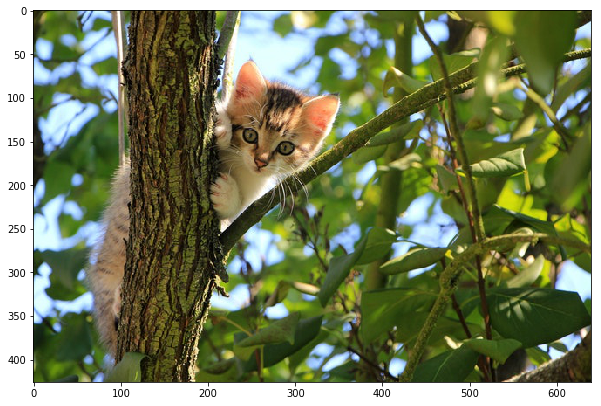

In [2]:
kitten = img_as_float(io.imread('./images/pexels-kitten.jpg'))

plt.figure(figsize=(10, 8))
plt.imshow(kitten)

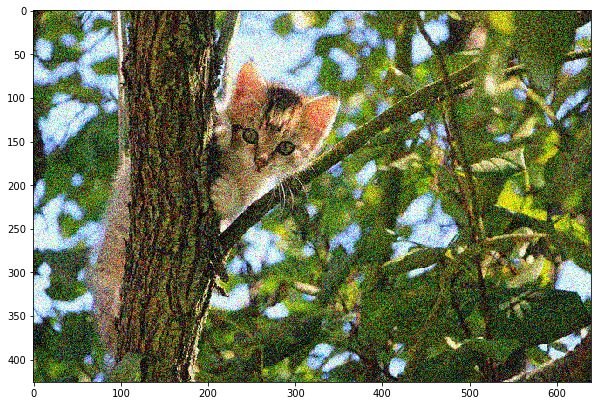

In [3]:
sigma = 0.155

noisy_kitten = random_noise(kitten, var=sigma**2)

plt.figure(figsize=(10, 8))
plt.imshow(noisy_kitten)

Estimate the average noise standard deviation across color channels.

* Due to clipping in random_noise, the estimate will be a bit smaller than the specified sigma
* A separate sigma for each colour channel is returned when multichannel is True

In [4]:
sigma_est = estimate_sigma(noisy_kitten, multichannel=True, average_sigmas=True)

print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

Estimated Gaussian noise standard deviation = 0.13779281534453425


# Total-variation Denoising

Perform total-variation denoising on n-dimensional images.

  * <b>image</b> = input image needed to be denoised.
  * <b>weight</b> = Denoising weight. <b>The greater weight, the more denoising</b>
  * <b>multichannel</b> = True; Apply total-variation denoising separately for each channel.

In [5]:
denoise_tv_1 = denoise_tv_chambolle(noisy_kitten, 
                                    weight=0.1,
                                    multichannel=True)

In [6]:
denoise_tv_2 = denoise_tv_chambolle(noisy_kitten,
                                    weight=0.2, 
                                    multichannel=True)

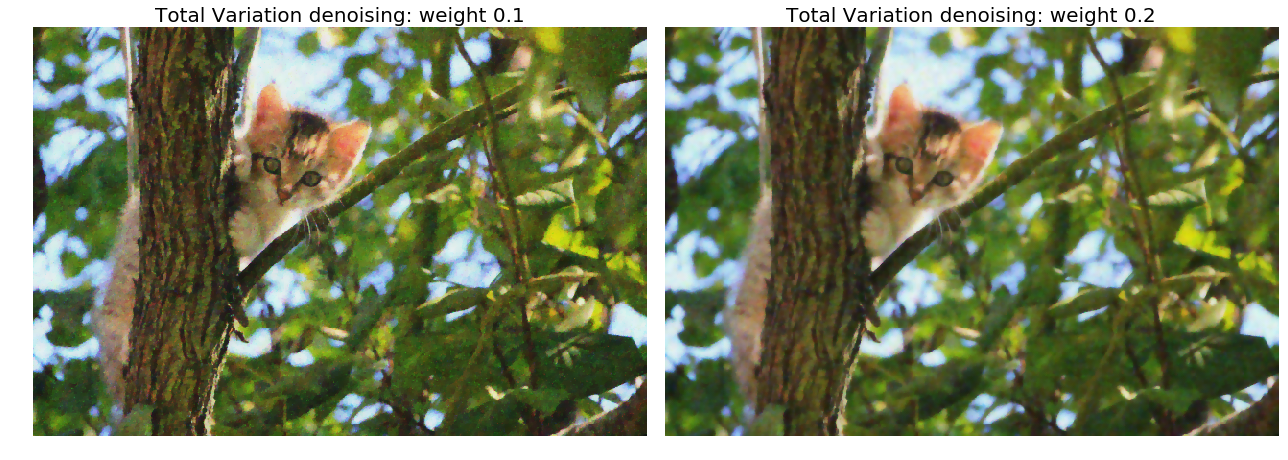

In [8]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(18, 14),
                       sharex=True, sharey=True)

ax[0].imshow(denoise_tv_1)
ax[0].axis('off')
ax[0].set_title('Total Variation denoising: weight 0.1', fontsize=20)

ax[1].imshow(denoise_tv_2)
ax[1].set_title('Total Variation denoising: weight 0.2', fontsize=20)
ax[1].axis('off')

fig.tight_layout()
plt.show()

# Bilateral Denoising

<b>A bilateral filter is an edge-preserving and noise reducing filter. It averages pixels based on their spatial closeness and radiometric similarity.</b>

  * <b>image</b> = input image needed to be denoised.
  * <b>sigma_color</b> = Standard deviation for grayvalue/color distance <b>A larger value results in averaging of pixels with larger radiometric differences.</b>
  * <b>sigma_spatial</b> = Standard deviation for range distance. <b>A larger value results in averaging of pixels with larger spatial differences.</b>
  * multichannel = True; Apply bilateral denoising separately for each channel.

In [9]:
denoise_bi_1 = denoise_bilateral(noisy_kitten, 
                                 sigma_color=0.05, 
                                 sigma_spatial=15,
                                 multichannel=True)

In [10]:
denoise_bi_2 = denoise_bilateral(noisy_kitten, 
                                 sigma_color=0.1, 
                                 sigma_spatial=15,
                                 multichannel=True)

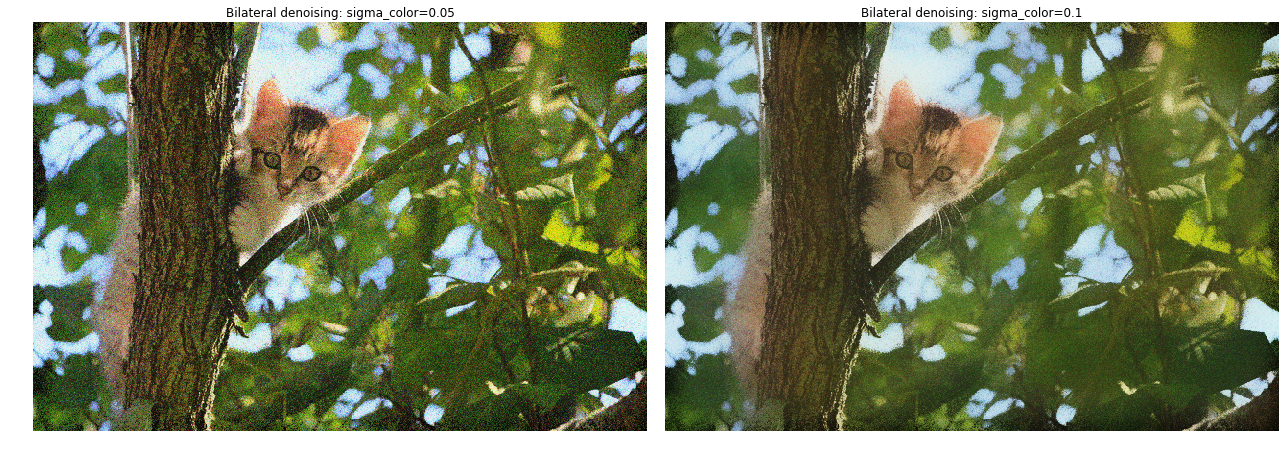

In [13]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(18, 14),
                       sharex=True, sharey=True)

ax[0].imshow(denoise_bi_1)
ax[0].axis('off')
ax[0].set_title('Bilateral denoising: sigma_color=0.05')

ax[1].imshow(denoise_bi_2)
ax[1].set_title('Bilateral denoising: sigma_color=0.1')
ax[1].axis('off')

fig.tight_layout()
plt.show()

## Wavelet Denoising
Wavelets are frequencies that has abrupt changes and does exist for short period of time

<b>A wavelet denoising filter relies on the wavelet representation of the image. The noise is represented by small values in the wavelet domain which are set to 0.</b>

* <b>image</b> = input image needed to be denoised.
* <b>mode</b> = 'soft'; An optional argument to choose the type of denoising performed, soft performs better than hard 
* <b>covert2ycbcr</b> = True; the wavelet denoising in the YCbCr colorspace instead of the RGB color space. YCbCr performs better than RGB
* <b>multichannel</b> = True; Apply wavelet denoising separately for each channel 

In [14]:
denoise_wave_1 = denoise_wavelet(noisy_kitten, 
                                 mode='soft',  
                                 multichannel=True, 
                                 convert2ycbcr=True)

In [15]:
denoise_wave_2 = denoise_wavelet(noisy_kitten, 
                                 mode='soft',  
                                 multichannel=True, 
                                 convert2ycbcr=False)

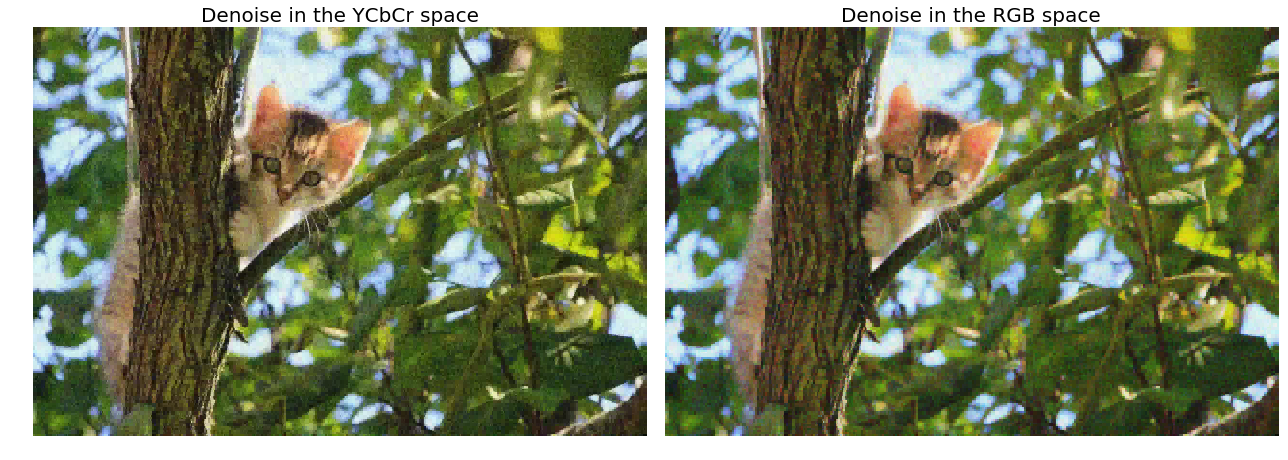

In [16]:
fig, ax = plt.subplots(1, 2, 
                       figsize=(18, 14),
                       sharex=True, sharey=True)

ax[0].imshow(denoise_wave_1)
ax[0].axis('off')
ax[0].set_title('Denoise in the YCbCr space', fontsize=20)

ax[1].imshow(denoise_wave_2)
ax[1].set_title('Denoise in the RGB space', fontsize=20)
ax[1].axis('off')

fig.tight_layout()
plt.show()